## 利用非线性SVM 对由cake函数生成的二类数据进行分类

<font size=4 color=blue> **Cake Function：** </font> <font size=4 face="宋体"> $f(x_1,x_2) = \begin{cases} +1 & x_1^2+x_2^2 \leq 1 \\ -1 & x_1^2+x_2^2 > 1 \end{cases}\ \ \ -2<x_1<2,-2<x_2<2$</font>

In [1]:
import os
import numpy as np
from nnc import dataset as Data
from nnc import ksvm

训练样本数目： 441
测试样本数目： 225


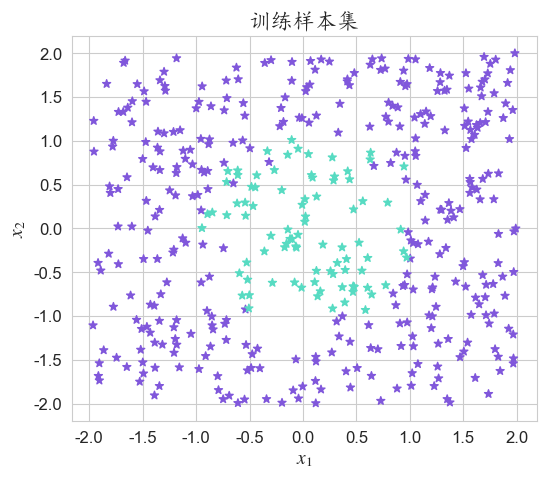

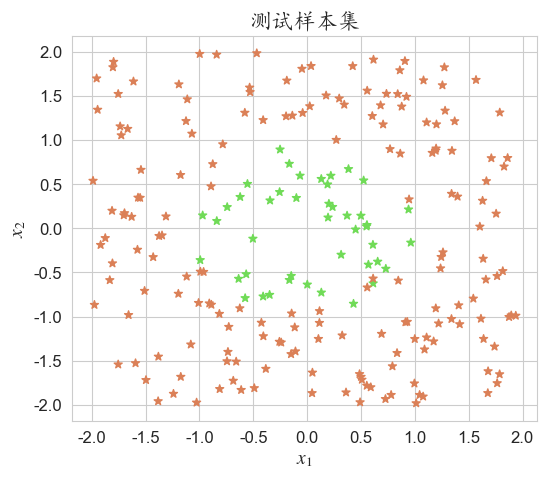

In [2]:
# 生成 cake 数据
# 由cake()函数生成数据
Data.seed_random(2000)    
# (1) 数据集构建
# 随机采集441个样本，并进行可视化。
sample_num = 21      # 按坐标采样点数目
interval = (-2,2)     # 函数自变量取值范围
noise = 0.25 #    0.0  #   0.5 #       # 数据中加入方差为noise的Gaussian白噪声
train_num = sample_num**2    
test_rate = 0.50             # 测试集数据比率
random_flag = 1              # 0-生成等间隔分布数据  1-生成随机分布的数据
# 生成数据
cake = Data.cake_data()
cake.gen_data(sample_num,test_rate=test_rate,interval=interval,noise=noise,random_flag=random_flag)
# 训练数据集
train_dataset = (cake.train_data[0],cake.train_data[1])
train_num = cake.train_data[2]      # 训练样本数目
# 测试数据集
test_dataset = (cake.test_data[0],cake.test_data[1])
test_num = cake.test_data[2]        # 测试样本数目

print('训练样本数目：',train_num)
print('测试样本数目：',test_num)
# 绘制数据图像
fig_path = os.path.normpath('image/classification/cake_svm/cake{}/fig/noise{}'.format(train_num,noise))
cake.draw_data(fig_path,fig_name=f'cake_train{train_num}_n{noise}.pdf',data_type='train')
cake.draw_data(fig_path,fig_name=f'cake_test{test_num}_n{noise}.pdf',data_type='test')
#cake.draw_data(fig_path,fig_name=f'sin_train{train_num}_test{test_num}_n{noise}.pdf',
              #train_data=train_dataset,test_data=test_dataset)

In [3]:
# 利用 核SVM 解决cake数据分类问题
train_num,input_size = train_dataset[0].shape    # 训练样本数目, 输入维度
test_num = test_dataset[0].shape[0]              # 测试样本数目

# 构建kernel_svm模型
# kernel = [polynomial_kernel,2]
sigma = 0.3
kernel = [ksvm.gauss_kernel,sigma]
#kernel = [laplace_kernel,0.5]
# C 正则化参数
# C = 0  硬间隔SVM
# C > 0  软间隔SVM 正则化参数
C = 0  #   5 # 
model = ksvm.kernel_svm(input_size,train_num,kernel=kernel,C=C)

# 实例化Runner类
runner = ksvm.Runner(model)

# 训练SVM
runner.train(train_dataset,test_dataset)

print('\n对{}个训练样本分类的正确率：{}%'.format(train_num,runner.train_score*100))
print('对{}个测试样本分类的正确率：{}%'.format(test_num,runner.test_score*100))
print('\n支持向量个数：{}'.format(model.support_num))
for i,idx in enumerate(model.support_id):
    print('sv-{}: {} d-{}: {}  a-{}: {:2f}'.format(idx,model.support_vectors[i],idx,model.support_tags[i],idx,model.support_alphas[i]))    
print('bias:',model.param['bias'])



     pcost       dcost       gap    pres   dres
 0: -4.7957e+01 -1.6065e+02  1e+03  2e+01  3e+00
 1: -1.1875e+02 -2.9116e+02  8e+02  1e+01  1e+00
 2: -2.7196e+02 -4.8465e+02  8e+02  1e+01  1e+00
 3: -6.5504e+02 -9.4153e+02  8e+02  1e+01  1e+00
 4: -1.4419e+03 -1.8584e+03  9e+02  9e+00  1e+00
 5: -2.6111e+03 -3.2944e+03  1e+03  8e+00  8e-01
 6: -4.0167e+03 -4.9698e+03  1e+03  5e+00  6e-01
 7: -4.6644e+03 -5.1584e+03  6e+02  1e+00  2e-01
 8: -4.6948e+03 -4.7122e+03  2e+01  4e-02  4e-03
 9: -4.6951e+03 -4.6955e+03  5e-01  8e-04  9e-05
10: -4.6951e+03 -4.6951e+03  1e-02  1e-05  1e-06
11: -4.6951e+03 -4.6951e+03  6e-04  1e-07  1e-08
12: -4.6951e+03 -4.6951e+03  2e-05  1e-09  1e-10
Optimal solution found.

对441个训练样本分类的正确率：100.0%
对225个测试样本分类的正确率：93.77777777777779%

支持向量个数：38
sv-4: [-0.49652729  0.91353825] d-4: -1  a-4: 43.426108
sv-25: [-0.4325774   0.60528853] d-25: 1  a-25: 653.833100
sv-37: [0.95477574 0.82733304] d-37: -1  a-37: 31.977701
sv-47: [-0.74388239 -0.22720774] d-47: -1  a-47: 